In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (classification_report,
                            accuracy_score,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            auc, 
                            r2_score,
                            mean_squared_error,
                            mean_absolute_error,
                            f1_score, 
                            precision_score,
                            recall_score, 
                            log_loss, 
                            matthews_corrcoef, 
                            cohen_kappa_score, 
                            balanced_accuracy_score, 
                            jaccard_score, 
                            fbeta_score, 
                            hamming_loss, 
                            zero_one_loss, 
                            explained_variance_score, 
                            mean_absolute_percentage_error)

In [37]:
# Load the dataset
data = pd.read_csv(r"C:\Users\KIIT\Downloads\USA_Housing.csv")

In [38]:
# For demonstration, let's predict 'Address' is not suitable (it's non-numeric and unique), 
# so let's predict 'Price' as a classification problem by binning it.
# Create a price category: 0 = below median, 1 = above median
median_price = data['Price'].median()
data['PriceCategory'] = (data['Price'] > median_price).astype(int)

In [39]:
# Features and target
X = data.drop(['Price', 'Address', 'PriceCategory'], axis=1)
y = data['PriceCategory']

In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Naive Bayes classifier
nb = GaussianNB()

# Model Fitting
nb.fit(X_train, y_train)

GaussianNB()

In [42]:
# Model Prediction
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

In [43]:
# Model Training Report
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2021
           1       0.89      0.89      0.89      1979

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



In [44]:
# Model Test Report
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       479
           1       0.89      0.88      0.89       521

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [45]:
# Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Training Accuracy: 0.892
Test Accuracy: 0.884


In [46]:
print("Confusion Matrix (Training):\n", confusion_matrix(y_train, y_pred_train))
print("Confusion Matrix(Test):\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix (Training):
 [[1802  219]
 [ 213 1766]]
Confusion Matrix(Test):
 [[424  55]
 [ 61 460]]


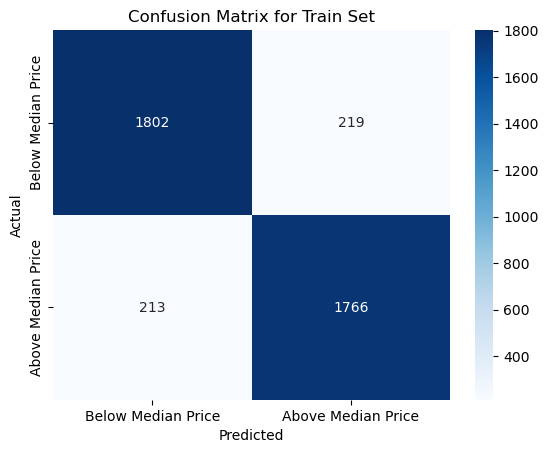

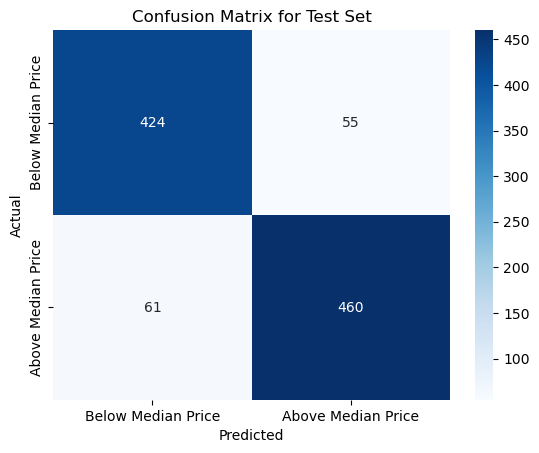

In [51]:
# Plotting confusion matrix for better visualization

sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median Price', 'Above Median Price'],
            yticklabels=['Below Median Price', 'Above Median Price'])
plt.title('Confusion Matrix for Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Below Median Price', 'Above Median Price'],
            yticklabels=['Below Median Price', 'Above Median Price'])
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

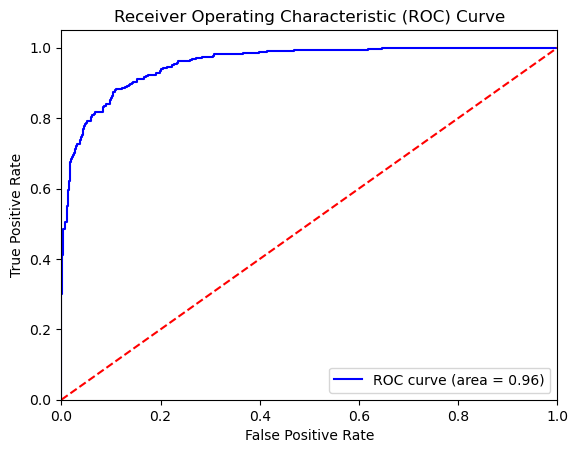

In [55]:
# Calculate ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [56]:
# Additional metrics
print("ROC AUC Score:", roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1]))
print("R2 Score:", r2_score(y_test, y_pred_test))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_test))
print("F1 Score:", f1_score(y_test, y_pred_test))
print("Precision Score:", precision_score(y_test, y_pred_test))
print("Recall Score:", recall_score(y_test, y_pred_test))
print("Log Loss:", log_loss(y_test, nb.predict_proba(X_test)[:, 1]))
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_test))
print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred_test))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_pred_test))
print("Jaccard Score:", jaccard_score(y_test, y_pred_test))
print("F-beta Score (beta=1):", fbeta_score(y_test, y_pred_test, beta=1))
print("Hamming Loss:", hamming_loss(y_test, y_pred_test))
print("Zero-One Loss:", zero_one_loss(y_test, y_pred_test))
print("Explained Variance Score:", explained_variance_score(y_test, y_pred_test))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, y_pred_test))


ROC AUC Score: 0.9560023882128075
R2 Score: 0.5351800576216446
Mean Squared Error: 0.116
Mean Absolute Error: 0.116
F1 Score: 0.888030888030888
Precision Score: 0.8932038834951457
Recall Score: 0.8829174664107485
Log Loss: 0.34272790419699467
Matthews Correlation Coefficient: 0.7677627316956517
Cohen's Kappa Score: 0.7677073112121273
Balanced Accuracy Score: 0.8840474597189443
Jaccard Score: 0.7986111111111112
F-beta Score (beta=1): 0.888030888030888
Hamming Loss: 0.116
Zero-One Loss: 0.11599999999999999
Explained Variance Score: 0.5353243120865205
Mean Absolute Percentage Error: 247697979505377.3
